# K-Nearest Neighbors

In [11]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
from sklearn import preprocessing 
%matplotlib inline

In [12]:
# load data
df = pd.read_csv(r"T:\My Drive\000 ihsan\02 Courses\003GIT\MYProject\Ml_project_IBM\teleCust1000t.csv")
df.head()


,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


## Data Visualization and Analysis

In [34]:
df['custcat'].value_counts() #provides a count of unique values in the custcat column


custcat
3    281
1    266
4    236
2    217
Name: count, dtype: int64

array([[<Axes: title={'center': 'income'}>]], dtype=object)

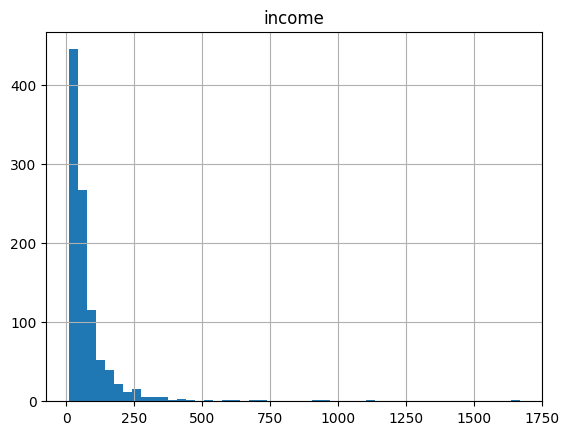

In [14]:
df.hist(column = 'income',bins = 50) # bins=50: Divides the range of data into 50 intervals (bins) for the histogram


In [15]:
#Feature set
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [16]:
x = df[['region', 'tenure','age', 'marital', 'address', 'income', 'ed', 'employ','retire', 'gender', 'reside']].values 
x[0:5]

array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.]])

In [17]:
y = df['custcat'].values
y[0:5]


array([1, 4, 3, 1, 3])

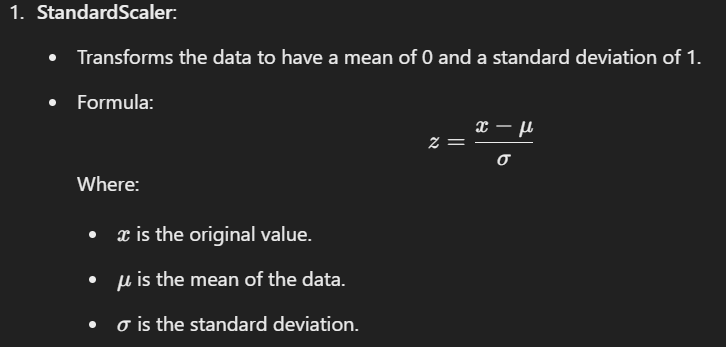

preprocessing.StandardScaler() initializes the scaler.

.fit(x) computes the mean and standard deviation of the data.

.transform(x.astype(float)) standardizes the data by applying the transformation to all values.


### Why Do We Standardize Data?


When features have different scales, large-scale features (e.g., income in thousands) can dominate smaller-scale features (e.g., age in years) in distance-based or gradient-based algorithms.

Relies on distance metrics. Features with larger scales can disproportionately affect distance calculations


In [19]:
# Normalize Data
x = preprocessing.StandardScaler().fit(x).transform(x.astype(float))
x[0:5]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577]])

x:
Feature matrix (independent variables).
Contains input data for training the model.


y:
Target vector (dependent variable).
Contains output labels corresponding to the feature matrix.


test_size=0.2:
Specifies that 20% of the dataset will be allocated to the test set.
Remaining 80% goes to the training set.


random_state=4:
Ensures the split is reproducible.
Using the same random_state value ensures the split will be identical every time the code runs.

In [22]:
# Train Test Split
from sklearn.model_selection import train_test_split # splitting datasets into training and testing subsets for machine learning tasks.

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2 , random_state = 4) #20% test and 80 % train

print('train set :' , xtrain.shape , ytrain.shape)
print('test set : ' , xtest.shape,ytest.shape)


train set : (800, 11) (800,)
test set :  (200, 11) (200,)


# Classification
# K nearest neighbor (KNN)

In [35]:
from sklearn.neighbors import KNeighborsClassifier #supervised machine learning algorithm that can be used for classification or regression. 

### Training

Let's start the algorithm with k=4 for now:


In [37]:
k = 4 # algorithm will consider the 4 nearest neighbors for making predictions
neigh = KNeighborsClassifier(n_neighbors=k).fit(xtrain,ytrain) # initializes the KNN classifier with k=4 neighbors , xtrain for features and ytrain for labels). 
neigh

KNeighborsClassifier(n_neighbors=4)

### Predicting

We can use the model to make predictions on the test set:


In [28]:
ypred = neigh.predict(xtest)
ypred

array([1, 1, 3, 2, 4, 3, 3, 2, 2, 4, 1, 4, 2, 1, 3, 1, 3, 4, 3, 4, 3, 3,
       3, 1, 1, 3, 1, 1, 1, 2, 1, 1, 4, 4, 3, 2, 3, 1, 2, 3, 1, 4, 2, 1,
       2, 1, 4, 1, 4, 4, 2, 1, 2, 3, 2, 3, 3, 3, 4, 1, 1, 4, 2, 3, 3, 1,
       1, 2, 2, 1, 1, 3, 4, 3, 2, 1, 4, 2, 2, 3, 3, 1, 2, 4, 4, 2, 3, 4,
       1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 3, 1, 1, 4, 1, 1, 1, 4, 2, 2, 2, 2,
       1, 3, 2, 4, 1, 2, 1, 1, 2, 3, 4, 2, 2, 3, 1, 1, 2, 3, 1, 3, 3, 1,
       1, 4, 2, 2, 2, 1, 1, 3, 1, 1, 4, 1, 1, 2, 1, 3, 2, 2, 1, 2, 2, 3,
       2, 3, 3, 3, 3, 2, 3, 1, 1, 1, 3, 4, 1, 1, 3, 1, 3, 3, 1, 2, 2, 2,
       1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 1, 1, 4, 4, 3, 1, 1, 3, 3, 4, 1, 4,
       3, 3])

In [30]:
yhat = neigh.predict(xtest)
yhat[0:5]

array([1, 1, 3, 2, 4])

### Accuracy evaluation

In multilabel classification, **accuracy classification score** is a function that computes subset accuracy. This function is equal to the jaccard_score function. Essentially, it calculates how closely the actual labels and predicted labels are matched in the test set.


#### metrics.accuracy_score(y_true, y_pred):

Measures how often predictions equal the actual labels.

y_true: True labels of the dataset.

y_pred: Predicted labels by the model.


In [33]:
from sklearn import metrics
print("train set accuracy : " , metrics.accuracy_score(ytrain,neigh.predict(xtrain)))
print("test set accuracy : " , metrics.accuracy_score(ytest,yhat))   #yhat = neigh.predict(xtest)

train set accuracy :  0.5475
test set accuracy :  0.32


### Practice

In [41]:
k = 6
neigh = KNeighborsClassifier(n_neighbors = k).fit(xtrain,ytrain)
neigh

from sklearn import metrics
print("Train set accuracy : " ,metrics.accuracy_score(ytrain,neigh.predict(xtrain)))
print("Test set accyuracy : " , metrics.accuracy_score(ytest,yhat))

Train set accuracy :  0.51625
Test set accyuracy :  0.32


In [45]:
ks = 10
meanacc = np.zeros(ks-1)
stdacc = np.zeros((ks-1))
print(meanacc)

[0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [58]:
ks = 10
meanacc = np.zeros((ks-1)) #(10-1) = 9.
stdaccc = np.zeros((ks-1))

for n in range (1 , ks) : # different values of n, representing the number of nearest neighbors to consider (from 1 to ks-1 where ks is typically set to 10).
    neigh = KNeighborsClassifier(n_neighbors=n).fit(xtrain,ytrain)
    ypred = neigh.predict(xtest)
    meanacc[n-1] = metrics.accuracy_score(ytest,ypred) ##mean_acc[0] = n-1 = 0, store 0 array , n = 1 that store index 0
    stdaccc[n-1] = np.std(ypred == ytest) / np.sqrt(ypred.shape[0]) #compute the standard error of the accuracy score for each value of k
    #Dividing by the square root of the sample size (np.sqrt(yhat.shape[0])) , [1, 0, 1, 1, 0, 1, 0] - 7 sample yhat.shape[0] = 7 , np.sqrt(yhat.shape[0]) = 2.64

#stdacc
meanacc



array([0.3  , 0.29 , 0.315, 0.32 , 0.315, 0.31 , 0.335, 0.325, 0.34 ])

In [55]:
stdaccc

array([0.0324037 , 0.03208582, 0.03284623, 0.03298485, 0.03284623,
       0.03270321, 0.03337477, 0.0331191 , 0.03349627])

## Plot the model accuracy for a different number of neighbors.

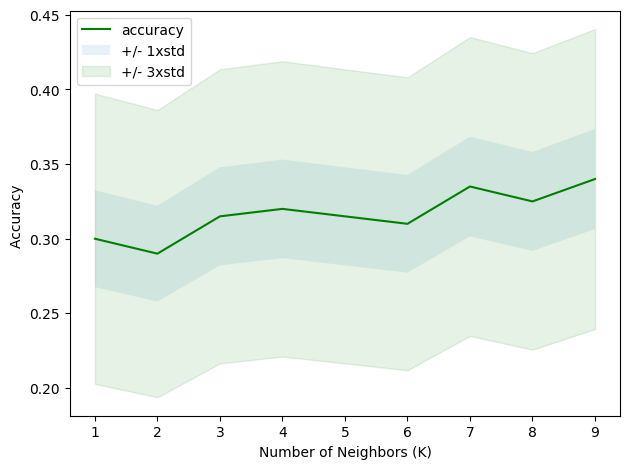

In [76]:
plt.plot(range(1,ks),meanacc,'g') # range(1, ks) creates a sequence of values for the x-axis (from 1 to ks , 'g' green color.

plt.fill_between(range(1,ks),meanacc-1*stdaccc,meanacc+1*stdaccc,alpha = 0.1) 
#mean_acc - 1 * std_acc and mean_acc + 1 * std_acc: These two expressions create the upper and lower bounds for the shaded region around the mean accuracy.
# mean_acc - 1 * std_acc represents the lower bound of the shaded region, and mean_acc + 1 * std_acc represents the upper bound.
# alpha=0.10 - 10% opacity

plt.fill_between(range(1,ks),meanacc-3*stdaccc,meanacc+3*stdaccc,alpha = 0.1 , color = 'green')

plt.legend(('accuracy','+/- 1xstd','+/- 3xstd'))

plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')

plt.tight_layout() 
#ery useful function to ensure that your plots are clean, readable, and not cluttered. It's especially important when you have complex plots with multiple elements (titles, axis labels, legends, etc.). Usin

plt.show()